<a href="https://colab.research.google.com/github/Bae-hong-seob/University-3-1/blob/main/visual_computing/crip_sheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Properties  

Good features should be detected regardless of image transformations  

• Harris corner detector is invariant to image rotation  
• Harris corner detector is partially invariant to image intensity change  
• Harris corner detector is not invariant to image scale  
• but applying different filter scale (relative to image resolution) can achieve scaleinvariant property!

# Scale Invariance  

DoG (response) image represents the ‘blob’ features   

local extrema로 blob을 filter  
> 그 후에 threshold도 적용시킬 수 있음 -> feature selection  
> threshold는 local extrema  

Through Laplacian pyramid image (using DoG) and thresholding,
the surviving key points (features) are invariant to image scale transform  
And, of course, because DoG (or LoG) is symmetric signature filter,
the key points (features) are also invariant to image rotation transform


# Rotation Invariance  

• Let’s consider the orientation of the key points (feature points)  
• consider the neighborhood pixels inside the window (mask) centered at the key point  
• find the dominant orientation (using gradient operator)  
• compute orientation histogram with dense bins (e.g., 36 bins)
  

Through considering the neighborhood pixels,
the surviving key points (features) have 
orientation property that is invariant to rotation transform  



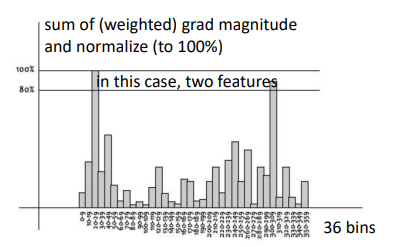

전체 vector의 방향 360도 에 대한 결과들.  
이때 y 값은 (각 방향에 대한 vecotr의 크기) 들의 합  

결국 전체 영상에 대해서 vector들을 히스토그램으로 정해봄.  
한 픽셀의 주 vector를 정하기 위한 방법. 
> 하지만 bins에 대해 vector를 정하기 때문에 각도가 하나로 딱 정해지지 않는다.  
> ex) 30~39도 사이에 feature vector를 정한다.  
> Harris corner detector에 비해 세밀한 부분에선 조금 떨어지지만 매우 싼 연산이 강점이다.  


Harris corner detector를 blob필터(=LoG, =DoG)도 있는데 쓰는 이유
> rotation에 대해 Invariant 속성 때문에.  
> 이때 둘 다 rotation에 대해 Invariant하지만 Harris corner detector의 경우 방향(orientation)에 대한 정보도 있기 때문에.  
> Blob filter의 경우 단순 corner detect는 수행하지만 eigenvector가 존재하지 않기 때문에 방향에 대한 정보는 주지 않음.  

pixel 주변에 변화량에 따라 eigen vector를 결정한다.  
모든 E(u,v)를 계산하는 Harris corner detecotr와는 살짝 다름.  
조금 더 라이트한 연산을 활용하여 orientation을 구함.  

weighted by gaussian kernel. 해당 pixel을 중심으로 주변에다가 가중치를 주게 됨.  

## 지금까지의 공부내용은 다음의 task를 수행하기 위함임.  

# Feature에 ID를 부여  
... rotation invariant한 feature를 만들 수 있다!!!

# Feature Descriptor  



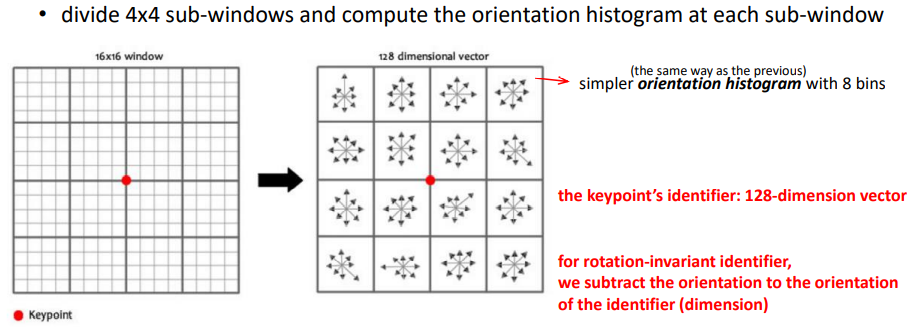

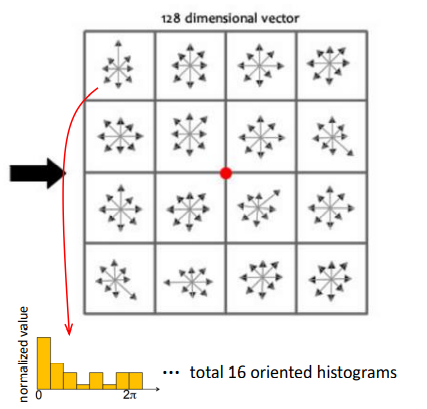

128 dim = 16(sub window num) * 8(45/360)  

Feature Descriptor 예시  

1. SIFT descriptor  

> • Scale-invariant LoG (simply called Laplacian) detector using DoG operator  
> • (addition) using scale-space representation  
• scale-space representation (octaves) can be used for more precise scale-invariant   
detectors (instead of using a simple Gaussian pyramid image)  
• Rotation-invariant orientation of the feature point  
• 128-dimension vector for the identifier of the feature point  

2. MOPS descriptor  

> Multi-scale Oriented PatcheS descriptor  
• At each image patch (a window centered at a key point)  
• Find dominant orientation of the image patch   
• Max eigenvector of M corresponding to 𝜆𝑚𝑎𝑥 (derived from SSD)  

3. SURF descriptor  

> Fast approximation of SIFT idea  
Efficient computation(haar wavelets) -> 6 times faster than SIFT  
Equivalent quality for object identification  

## • Feature Descriptor  
• Identify the vector (feature descriptor) that differentiate one feature from others  
• A feature point set, or a feature point with its neighborhood pixels  

Feature Descriptor: Invariance vs. discriminability  
• Discriminability  
> Descriptors should BE highly UNIQUE for each point

• Invariance  
> Descriptors should NOT change even if image is transformed



# Application: Image stitching  

1. Find a set of distinctive key-points  
2. Define a region around each keypoint  
3. Extract and normalize the region content  
4. compute a local descriptor from the normalized region  
5. match local descriptors  



# Corresponding pairs: Feature distance  


L1 distance = L1 norm = rectilinear distance(맨하탄 거리)
L2 distance = L2 norm = Euclidean distance (green)  

• How to define the difference between two features 𝑓1, 𝑓2?  
• simple approach: L2 distance, 𝑓1 − 𝑓2  
> can give good scores to ambiguous (incorrect) matches  

• Better approach: ratio distance = 𝑓1 − 𝑓2 / 𝑓1 − 𝑓2  
> 0에 가까울수록 high match, 1에 가까울수록 ambiguous match  

• 𝑓2 is the best SSD (summed of squared distance) match to 𝑓1 in 𝐼2  
• 𝑓2′is the second SSD match to 𝑓1 in 𝐼2  
> gives bad scores for ambiguous matches  

good scores = low feature distance


# --------------------------------------------------------

# Transformation  

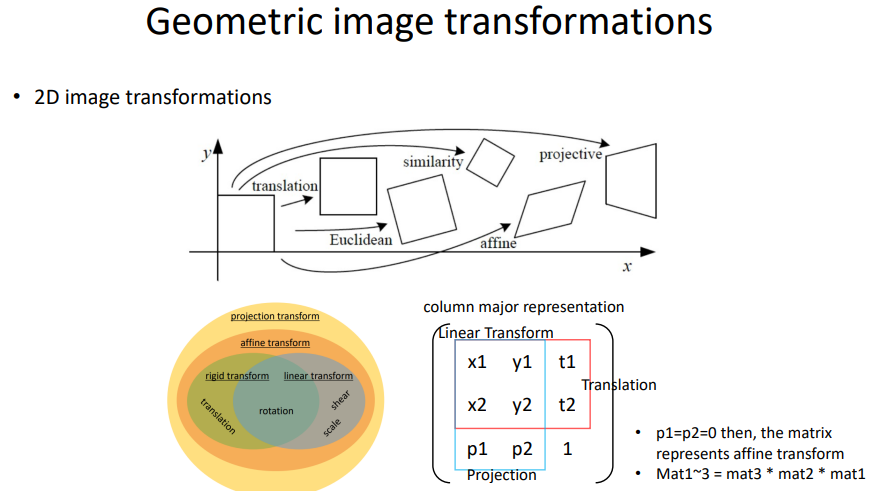

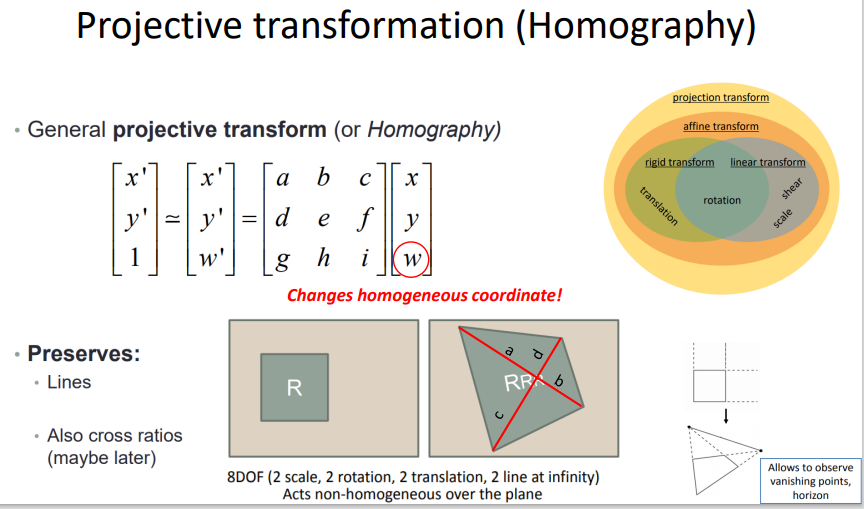

ㄴ 그냥 암기해.  
perspective transform -> rotation, scale, transform 다 포함